# Лабораторная работа 2
#### Выполнила: Гуськова Елизавета
#### Группа: 16-В-1
#### Цель лабораторной работы – получение навыков работы с методами классификации.

#### Кодировка классификаторов:
2. – классификатор K ближайших соседей (задаётся радиус для выбора ближайших объектов);
4. – логический классификатор (бинарное решающее дерево).

#### Вариант 10. 
###### Набор данных / Классификаторы - 1 / 2, 4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from scipy import stats
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (auc, roc_curve, precision_recall_curve, average_precision_score)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


### 1.Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных.

In [2]:
dF = pd.read_csv('C:\\student\\lab2\\mushrooms.csv', encoding = "ISO-8859-1")
dF.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
dF.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [4]:
dF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [5]:
dF

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


1. cap-shap:                 Форма шляпки
2. cap-surface:              Поверхность шляпки
3. cap-color:                Цвет шляпки
4. bruises:                  Пятна
5. odor:                     Запах
6. gill-attachment:          Форма жабер
7. gill-spacing:             Расстояние между жабрами
8. gill-size:                Размер жабер
9. gill-color:               Цвет жабер
10. stalk-shape:             Форма ножки
11. stalk-root:              Корень
12. stalk-surface-above-ring:Форма ножки выше юбки
13. stalk-surface-below-ring:Форма ножки ниже юбки
14. stalk-color-above-ring:  Цвет ножки выше юбки
15. stalk-color-below-ring:  Цвет ножки ниже юбки
16. veil-type:               Форма юбки
17. veil-color:              Цвет юбки
18. ring-number:             Количество колец
19. ring-type:               Тип кольца
20. spore-print-color:       Цвет спор
21. population:              Популяция
22. habitat:                 Среда обитания

### 2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;

In [6]:
dF.shape

(8124, 23)

In [7]:
dF = dF.dropna()
dF = dF.drop_duplicates()
dF.shape

(8124, 23)

In [8]:
dF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

### 3. Оцените сбалансированность данных по классам. Используйте полученную информацию при выборе метрики оценки качества классификации.

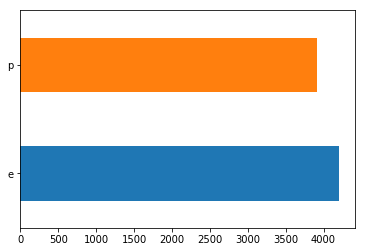

In [12]:
dF['class'].value_counts().plot.barh()
plt.show()

Как видим, классы сбалансированны.

### 4. Выполните масштабирование количественных признаков.

Так как в данном наборе данных нет количественных признаков, масштабирование не требуется.

### 5. Выполните замену категориальных признаков.

In [14]:
dF.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [15]:
dF.drop('veil-type', axis = 1, inplace = True)

In [16]:
label_encoder = LabelEncoder()

{0: 'f', 1: 't'}


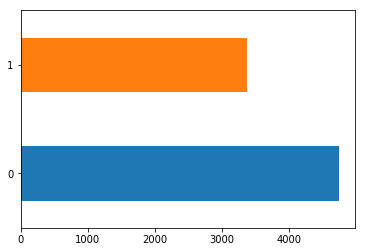

In [17]:
mapped_education = pd.Series(label_encoder.fit_transform(dF['bruises']))
mapped_education.value_counts().plot.barh()
print(dict(enumerate(label_encoder.classes_)))

In [18]:
categorical_columns = dF.columns[dF.dtypes == 'object'].union(['bruises'])
for column in categorical_columns:
    dF[column] = label_encoder.fit_transform(dF[column])

In [19]:
dF.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


### 6. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других.

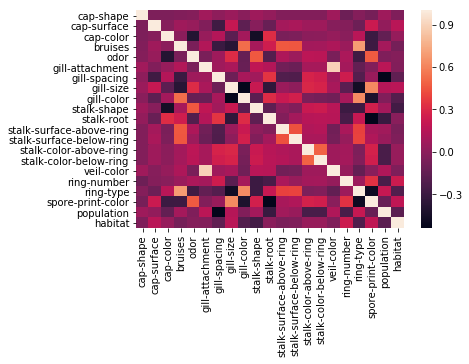

In [20]:
corr_matrix = dF.drop('class', axis=1).corr()
sns.heatmap(corr_matrix);
plt.show()

### 7. Заполните пропущенные значения в данных.

Пропусков нет

### 8. Решите поставленную задачу классификации в соответствии с заданием.

* 2 – классификатор K ближайших соседей (задаётся радиус для выбора ближайших объектов)

In [24]:
dF1 = dF.copy()
X, Y = dF.drop('class', axis=1), dF['class']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 123)
print(X_train.shape)
print(X_test.shape)

# найдем оптимальный радиус для классификатора ближайших соседей
rnc = RadiusNeighborsClassifier(outlier_label=1) 

params = {'radius': np.arange(0, 5, 0.25)}

rnc_grid = GridSearchCV(rnc, params)
rnc_grid.fit(X_train, Y_train)

best_radius = rnc_grid.best_estimator_.radius
best_score = rnc_grid.best_score_
print('best train score:', best_score)
print('at radius:', best_radius)

rnc = RadiusNeighborsClassifier(outlier_label=1, radius=best_radius)
rnc.fit(X_train, Y_train)
best_score  = np.mean(Y_test  == rnc.predict(X_test))
print('test score: ', best_score)

(5686, 21)
(2438, 21)
best train score: 0.9950756243404854
at radius: 3.0
test score:  0.9963084495488105


* 3 – логический классификатор (бинарное решающее дерево)

In [25]:
#найдем оптимальные глубину и количества учитываемых параметров для классификатора решающее дерево
dtc = DecisionTreeClassifier()

params = {'max_depth': list(range(1,22)), 'max_features': list(range(1,22))}

dtc_grid = GridSearchCV(dtc, params)
dtc_grid.fit(X_train, Y_train)

best_features = dtc_grid.best_estimator_.max_features
best_depth = dtc_grid.best_estimator_.max_depth
best_score = dtc_grid.best_score_
print('best train score:', best_score)
print('at features number:', best_features)
print('at depth:', best_depth)

dtc = DecisionTreeClassifier(max_depth=best_depth, max_features=best_features)
dtc.fit(X_train, Y_train)
best_score  = np.mean(Y_test == dtc.predict(X_test))
print('test score: ', best_score)

best train score: 1.0
at features number: 17
at depth: 7
test score:  0.9950779327317474


In [26]:
class MyRadiusNeighborsClassifier(RadiusNeighborsClassifier):
        
    def predict_proba(self, X_test, X_train, Y_train):
        
        runs = 25
        dr = (2*self.radius/runs)    
        
        radiuses = [dr*i for i in range(runs)]  
        percentage = [i/runs for i in range(runs)]
        percentage = sorted(percentage, reverse=True)
        probas = np.ndarray((len(Y_test),2), dtype=np.float)
        for i in range(len(probas)):
            probas[i] = [0, 1]
        
        for i, radius in enumerate(radiuses):
            if i==0:
                rnc_temp = RadiusNeighborsClassifier(radius, outlier_label=1)
                predict_first = rnc_temp.fit(X_train, Y_train).predict(X_test)
                continue
            else:
                predict_second = predict_first
                rnc_tmp = RadiusNeighborsClassifier(radius, outlier_label=1)
                predict_first = rnc_tmp.fit(X_train, Y_train).predict(X_test)
        
            for j, (p1, p2) in enumerate(zip(predict_first, predict_second)):
                if p1!=p2:
                    probas[j,0] = percentage[i]
                    probas[j,1] = 1-probas[j,0]
                
        return probas

* Постройте кривые PR и ROC

1) ROC график K соседей и решающего дерева

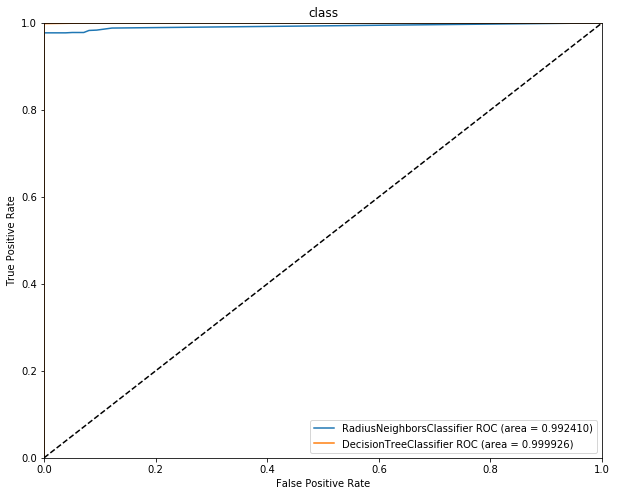

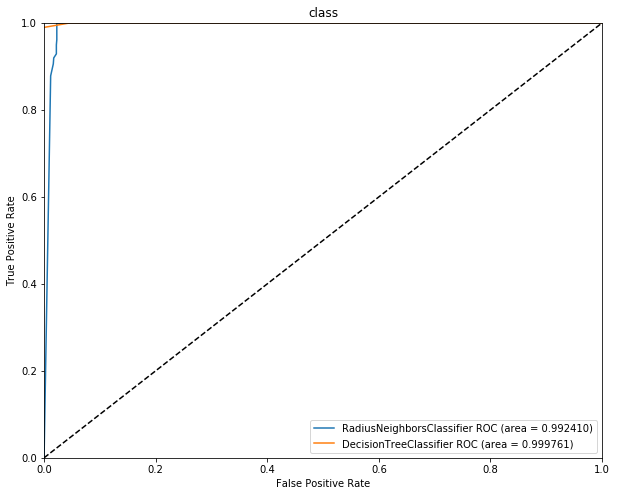

In [27]:
plt.figure(figsize=(10,8))
# K ближайщих соседей
mrnc = MyRadiusNeighborsClassifier(outlier_label=1, radius=best_radius)
probas_mrnc0 = mrnc.predict_proba(X_test, X_train, Y_train)
tpr, fpr, thresholds = roc_curve(Y_test, probas_mrnc0[:,0])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('RadiusNeighborsClassifier', roc_auc)) 
# Решающее дерево
dtc = DecisionTreeClassifier(max_depth=best_depth, max_features=best_features)
probas_dtc0 = dtc.fit(X_train, Y_train).predict_proba(X_test)
tpr, fpr, thresholds = roc_curve(Y_test, probas_dtc0[:,0])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('DecisionTreeClassifier', roc_auc))   
# Вывод графика
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.title('class')
plt.show()

plt.figure(figsize=(10,8))
# K ближайщих соседей
mrnc = MyRadiusNeighborsClassifier(outlier_label=1, radius=best_radius)
probas_mrnc1 = mrnc.predict_proba(X_test, X_train, Y_train)
fpr, tpr, thresholds = roc_curve(Y_test, probas_mrnc1[:,1])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('RadiusNeighborsClassifier', roc_auc)) 
# Решающее дерево
dtc = DecisionTreeClassifier(max_depth=best_depth, max_features=best_features)
probas_dtc1 = dtc.fit(X_train, Y_train).predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, probas_dtc1[:,1])
roc_auc  = auc(fpr, tpr)
plt.plot(fpr, tpr, label='%s ROC (area = %f)' % ('DecisionTreeClassifier', roc_auc))   
# Вывод графика
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.title('class')
plt.show()

2) PR график K соседей и решающего дерева

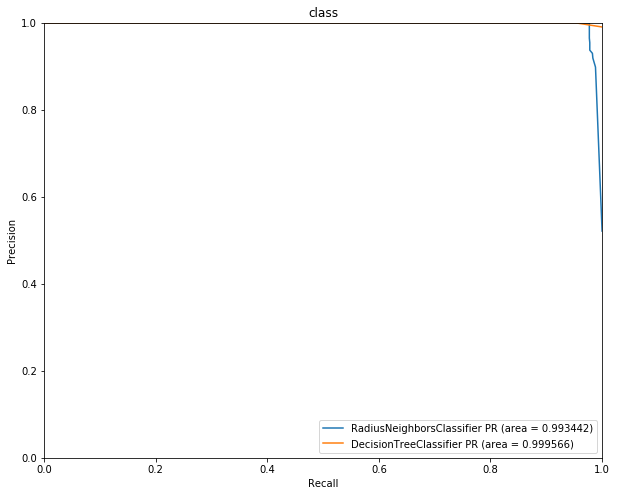

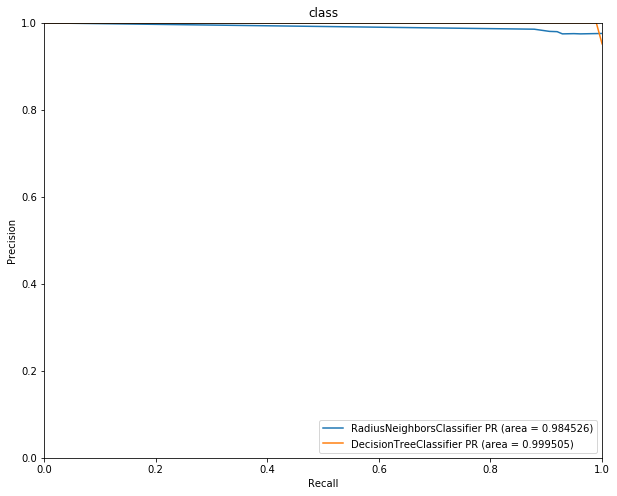

In [28]:
plt.figure(figsize=(10,8))
Y_test_invers = []
for i, y in enumerate(Y_test.reset_index(drop=True)):
    Y_test_invers.append(1-y)
# K ближайщих соседей
precision, recall, thresholds = precision_recall_curve(Y_test_invers, probas_mrnc1[:,0])
aps_mrnc1 = average_precision_score(Y_test_invers,probas_mrnc1[:,0])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('RadiusNeighborsClassifier', aps_mrnc1)) 
# Решающее дерево
precision, recall, thresholds = precision_recall_curve(Y_test_invers, probas_dtc1[:,0])
aps_dtc1 = average_precision_score(Y_test_invers,probas_dtc1[:,0])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('DecisionTreeClassifier',  aps_dtc1)) 
# Вывод графика
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc=4, fontsize='medium')
plt.title('class')
plt.show()

plt.figure(figsize=(10,8))
# K ближайщих соседей
precision, recall, thresholds = precision_recall_curve(Y_test, probas_mrnc1[:,1])
aps_mrnc1 = average_precision_score(Y_test,probas_mrnc1[:,1])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('RadiusNeighborsClassifier', aps_mrnc1)) 
# Решающее дерево
precision, recall, thresholds = precision_recall_curve(Y_test, probas_dtc1[:,1])
aps_dtc1 = average_precision_score(Y_test,probas_dtc1[:,1])
plt.plot(recall, precision, label='%s PR (area = %f)' % ('DecisionTreeClassifier',  aps_dtc1)) 
# Вывод графика
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc=4, fontsize='medium')
plt.title('class')
plt.show()

### 9. Вывод

Относительно кривых PR и ROC, у классификаторов практически одинаковые показатели качества. Очень точно решают данную задачу.